<a href="https://colab.research.google.com/github/jako323/Most-Streamed-Songs-with-Python-Machine-Learning/blob/main/research_files/KEY_model_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
## parameters  key and bpm have a least 20% infulence over the songs streams
# predict key and bpm regargding all the other parameters
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import date
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVR
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

#from google.colab import drive

#drive.mount('/content/drive')
#data = pd.read_csv("/content/drive/MyDrive/MAIN_DATASET_spotify2023.csv")
data = pd.read_csv("MAIN_DATASET_spotify2023.csv")
data.head()
encoder = LabelEncoder()
data["key"] = encoder.fit_transform(data["key"])
data["mode"] = encoder.fit_transform(data["mode"])
released_day_of_year = []

for i in range(len(data.index)):
    day_of_year = date(data['released_year'][i],
                    data['released_month'][i],
                    data['released_day'][i]).timetuple().tm_yday
    released_day_of_year.append(day_of_year)

# add new series to dataframe
data.insert(len(data.columns), "released_day_of_year", released_day_of_year, True)

data = data[["released_day_of_year", 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

In [40]:
X = data.drop("key", axis = 1)
y = data["key"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_help, y_help, test_size=0.5, random_state=42)

#val_percent = (len(X_val)/(len(data)))*100
#test_percent = (len(X_test)/(len(data)))*100
#train_percent = (len(X_train)/(len(data)))*100
#print(f"Percent of Train: {train_percent:.2f} ,Validation:{val_percent:.2f} and Test dataset:{test_percent:.2f} ")


## Task 1,2

In [41]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)
random_weights = np.random.rand(len(y_train))

reg.fit(X_train, y_train, sample_weight=weights_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

cv_values = [3,5,10]
for k in cv_values:
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse_train: {rmse}, Mean_train:  {mean}")

mean of 3-folds cross_validation: 3.5593314868662365
mean of 5-folds cross_validation: 3.549688471995996
mean of 10-folds cross_validation: 3.5502372033050804

Rmse_val: 3.4177158848114684, Mean_val:  11.680781869292638
Rmse_train: 3.498454364031398, Mean_train:  12.239182937210334


##  Task3 neural regresor

In [42]:


reg = MLPRegressor(hidden_layer_sizes=(5, 6, 5), random_state=50, max_iter=50, solver='lbfgs')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)
cv_values = [3,5,10]
for k in cv_values:
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse_train: {rmse}, Mean_train:  {mean}")

mean of 3-folds cross_validation: 3.565829976508873
mean of 5-folds cross_validation: 3.559791627088964
mean of 10-folds cross_validation: 3.5444137072425805

Rmse_val: 3.43416258948091, Mean_val:  11.79347269099023
Rmse_train: 3.548409472105155, Mean_train:  12.591209781725583


## Grid Search

In [43]:



parameters = {'max_iter' : [50,100,150,400,800],'solver':('lbfgs', 'sgd', 'adam'), 'hidden_layer_sizes':[(10, 5, 5), (5, 10, 5), (5, 5, 10),(5,5), (5,10)], "random_state" :[50,100,150,200]}
#parameters = {'solver':('lbfgs', 'sgd', 'adam'),  "random_state" :[50]}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)# to get the best estimator
#print(grid_search.cv_results_) # to get all results



{'hidden_layer_sizes': (5, 10, 5), 'max_iter': 150, 'random_state': 100, 'solver': 'sgd'}
MLPRegressor(hidden_layer_sizes=(5, 10, 5), max_iter=150, random_state=100,
             solver='sgd')
-3.5277957955187604


## Random Search

In [44]:

logistic = MLPRegressor(hidden_layer_sizes=(5, 5, 10), random_state=50, max_iter = 50 )
distributions = dict(alpha=uniform(loc=0, scale=8), solver =['lbfgs', 'sgd', 'adam'])
Random_search = RandomizedSearchCV(logistic, distributions, random_state=0, scoring='neg_root_mean_squared_error')
Random_search.fit(X_train, y_train)
print(Random_search.best_params_) # to get the best parameters
print(Random_search.best_estimator_)
print(Random_search.best_score_)

{'alpha': 0.45370381853954544, 'solver': 'lbfgs'}
MLPRegressor(alpha=0.45370381853954544, hidden_layer_sizes=(5, 5, 10),
             max_iter=50, random_state=50, solver='lbfgs')
-3.6031625485863685


## Task 4  Polynomial reggresor

In [45]:
# Create polynomial features
poly_features = PolynomialFeatures(degree = 2) #4 poziom najlepszy
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred_train = reg.predict(X_train_poly)
y_pred = reg.predict(X_val_poly)

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

cv_values = [3,5,10]
for k in cv_values:
    scores_val_score = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores_val_score.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation: {-mean_cross}")


scores = cross_validate(reg, X_train, y_train, cv=5,scoring=['r2','neg_mean_absolute_error'])
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")
#print(scores['fit_time'])
#print(scores['score_time'])


rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse_train: {rmse}, Mean_train:  {mean}")


mean of 3-folds cross_validation: 3.5593314868662365
mean of 5-folds cross_validation: 3.549688471995996
mean of 10-folds cross_validation: 3.5502372033050804

r2: -0.004040137509725849
mean_abs_error: -3.145777542310018

Rmse_val: 3.5555497422211295, Mean_val:  12.641933969408742
Rmse_train: 3.392152455578089, Mean_train:  11.506698281884457


## SVM

In [46]:

# Kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
#linear the best but the longest so most complicated

reg = SVR(C=2, epsilon=0.2, kernel='poly', max_iter=50)
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
mean_val = mean_squared_error(y_val, y_pred)

cv_values = [3,5,10]
for k in cv_values:
    scores_val_score = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    #print(scores)
    mean_cross = scores_val_score.mean()
    # chcek if minus is good for rmse without negative
    print(f"mean of {k}-folds cross_validation rmse: {-mean_cross}")

scores = cross_validate(reg, X_train, y_train, cv=5,scoring=['r2','neg_mean_absolute_error'])

print(f"\nr2: {scores['test_r2'].mean()}")
print(f"mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")



rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_val: {rmse_val}, Mean_val:  {mean_val}")
print(f"Rmse_train: {rmse}, Mean_train:  {mean}")

mae = mean_absolute_error(y_val, y_pred)
print("\nMean Absolute Error:", mae)



mean of 3-folds cross_validation rmse: 5.8372742111397535
mean of 5-folds cross_validation rmse: 7.6676810729176
mean of 10-folds cross_validation rmse: 8.035770303042364

r2: -4.0252255816352935
mean_abs_error: -6.632517566321079

Rmse_val: 8.599616969802858, Mean_val:  73.95341202732129
Rmse_train: 8.543881219005394, Mean_train:  72.9979062844731

Mean Absolute Error: 7.756823412268719


In [47]:
#GridSearch
parameters = {'max_iter' : [50,100,150,400,800],'kernel':('linear', 'poly', 'rbf', 'sigmoid')}
#parameters = {'solver':('lbfgs', 'sgd', 'adam'),  "random_state" :[50]}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_)
print(grid_search.best_score_)# to get the best estimator
#print(grid_search.cv_results_) # to get all results


{'kernel': 'rbf', 'max_iter': 400}
SVR(C=2, epsilon=0.2, max_iter=400)
-3.597546869875308


In [48]:
#RandomSearch
logistic = SVR( epsilon=0.2, kernel='poly', max_iter=400)
distributions = dict(C=uniform(loc=0, scale=10), coef0 =uniform(loc=0, scale=10), epsilon= uniform(loc=0, scale=10))
Random_search = RandomizedSearchCV(logistic, distributions, random_state=0, scoring='neg_root_mean_squared_error')
Random_search.fit(X_train, y_train)
print(Random_search.best_params_) # to get the best parameters
print(Random_search.best_estimator_)
print(Random_search.best_score_)

{'C': 5.4881350392732475, 'coef0': 7.151893663724195, 'epsilon': 6.027633760716439}
SVR(C=5.4881350392732475, coef0=7.151893663724195, epsilon=6.027633760716439,
    kernel='poly', max_iter=400)
-3.5544707653707177


## SVM model with best  parameters

In [49]:
reg = SVR(C=5.4881350392732475, coef0=7.151893663724195, epsilon=6.027633760716439, kernel='poly', max_iter=400)
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))
mean_test = mean_squared_error(y_test, y_pred_test)


rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_test: {rmse_test}, Mean_test:  {mean_test}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mae = mean_absolute_error(y_test, y_pred_test)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred_test)
print("\nR2:", r2)


Rmse_test: 3.4442075206099556, Mean_test:  11.862565445026178
Rmse: 3.556240466409397, Mean:  12.646846254927727

Mean Absolute Error: 3.075916230366492

R2: -0.005927946481701918


## Linear regression with test dataset

In [50]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)
random_weights = np.random.rand(len(y_train))

reg.fit(X_train, y_train, sample_weight=weights_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

rmse_test = np.sqrt(np.mean((y_pred - y_test)**2))
mean_test = mean_squared_error(y_test, y_pred)


rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)

print(f"\nRmse_test: {rmse_test}, Mean_test:  {mean_test}")
print(f"Rmse: {rmse}, Mean:  {mean}")

mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("\nR2:", r2)


Rmse_test: 3.4177158848114684, Mean_test:  11.680781869292638
Rmse: 3.498454364031398, Mean:  12.239182937210334

Mean Absolute Error: 3.0643993252985853

R2: 0.00948703098579129


# Final Assessment of the model

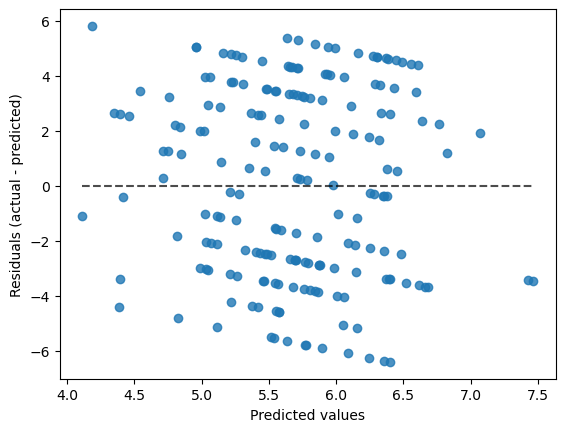

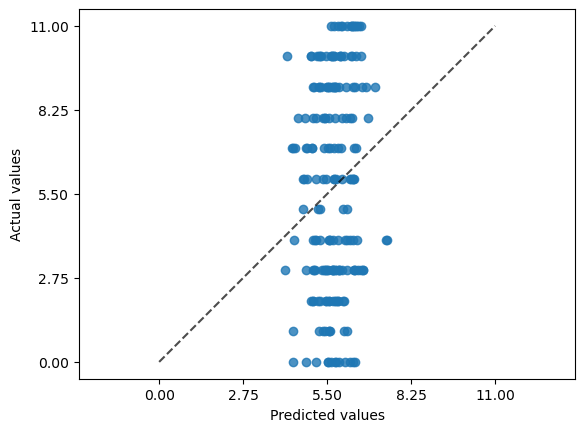

In [51]:
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import confusion_matrix
PredictionErrorDisplay.from_estimator(reg, X_test, y_test,
kind="residual_vs_predicted")
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred,
kind="actual_vs_predicted")


## Pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
clf_mlp1 = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier(max_iter=5000, random_state=1, solver='adam', alpha =0.0001))])
clf_mlp1.fit(X_train, y_train)

y_pred_train = clf_mlp1.predict(X_train)
y_pred = clf_mlp1.predict(X_val)


acc_train = accuracy_score(y_train, y_pred_train)
acc_val = accuracy_score(y_val, y_pred)
print(f"Accuracy train: {acc_train}, accuracy validation: {acc_val}")


Accuracy train: 0.9592641261498029, accuracy validation: 0.09424083769633508
